In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install MiniSom 

  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=a18e645989aacbe172ef0a6ab62e94f04ed1e38e3338639cc4e0ef726af62004
  Stored in directory: c:\users\enoch\appdata\local\pip\cache\wheels\7e\47\6d\97ad48be13d8b0fc231b7df226a3d6645820c32559822a826c
Successfully built MiniSom


In [3]:
df = pd.read_csv('Credit_Card_Applications.csv')

In [4]:
df.head()


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

### Training SOM

In [24]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Visualizing

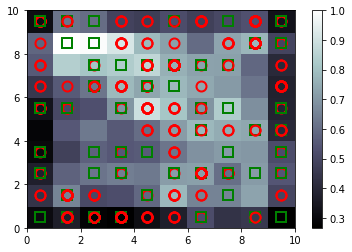

In [25]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding frauds


In [36]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,8)], mappings[(2,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

[[1.5571121e+07 0.0000000e+00 1.5830000e+01 5.8500000e-01 2.0000000e+00
  8.0000000e+00 8.0000000e+00 1.5000000e+00 1.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+02 1.0000000e+00]
 [1.5660390e+07 0.0000000e+00 5.8670000e+01 4.4600000e+00 2.0000000e+00
  1.1000000e+01 8.0000000e+00 3.0400000e+00 1.0000000e+00 1.0000000e+00
  6.0000000e+00 0.0000000e+00 2.0000000e+00 4.3000000e+01 5.6100000e+02]
 [1.5577515e+07 0.0000000e+00 6.8670000e+01 1.5000000e+01 2.0000000e+00
  1.0000000e+01 9.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.4000000e+01 0.0000000e+00 2.0000000e+00 0.0000000e+00 3.3770000e+03]
 [1.5657778e+07 0.0000000e+00 2.4750000e+01 3.0000000e+00 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.8350000e+00 1.0000000e+00 1.0000000e+00
  1.9000000e+01 0.0000000e+00 2.0000000e+00 0.0000000e+00 5.0100000e+02]
 [1.5652658e+07 0.0000000e+00 3.3080000e+01 4.6250000e+00 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.6250000e+00 1.0000000e+00 1.

In [37]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15571121
15660390
15577515
15657778
15652658
15624595
15688264
15720644
15746258
15644878
15671987
15778345
15700511
15776494
15744423
15814116
15785705
